In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

import warnings
warnings.filterwarnings('ignore')

In [77]:
df = pd.read_csv('data\loan_data_2007_2014.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [78]:
list_item = []
for i in df.columns:
    list_item.append([i, df[i].dtype, df[i].isna().sum(), 100*df[i].isna().sum()/len(df[i]), df[i].nunique(), df[i].unique()])

describe_df = pd.DataFrame(data = list_item,
                           columns=['feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])
describe_df

,feature,data_type,null_num,null_persen,unique_num,unique_sample
0,Unnamed: 0,int64,0,0.000000,466285,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,int64,0,0.000000,466285,"[1077501, 1077430, 1077175, 1076863, 1075358, ..."
2,member_id,int64,0,0.000000,466285,"[1296599, 1314167, 1313524, 1277178, 1311748, ..."
3,loan_amnt,int64,0,0.000000,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
4,funded_amnt,int64,0,0.000000,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
...,...,...,...,...,...,...
70,all_util,float64,466285,100.000000,0,[nan]
71,total_rev_hi_lim,float64,70276,15.071469,14612,"[nan, 59900.0, 15100.0, 61100.0, 8100.0, 15400..."
72,inq_fi,float64,466285,100.000000,0,[nan]
73,total_cu_tl,float64,466285,100.000000,0,[nan]


In [79]:
#看重复行
total_duplicates = df.duplicated().sum()
print(f"Total number of duplicate rows: {total_duplicates}\n")

Total number of duplicate rows: 0



In [80]:
#看缺失值
def missing_value(df):
    missing_value = df.isnull().sum()
    if missing_value.any():
        print("Columns with missing values:")
        print(missing_value[missing_value > 0])
    else:
        print("There are no missing value.")

missing_value(df)

Columns with missing values:
emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340304
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m          

In [81]:
#删除
df = df.drop(columns=['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc',
                      'open_rv_24m','open_rv_12m','il_util','total_bal_il','mths_since_rcnt_il',
                      'open_il_24m','open_il_12m','open_il_6m','open_acc_6m','verification_status_joint',
                      'dti_joint','annual_inc_joint'])
df = df.drop(columns=['mths_since_last_record','Unnamed: 0','desc','next_pymnt_d','policy_code','id',
                      'member_id','application_type'])
#替换
# Fill missing values with 'Unknown'
df['emp_title'].fillna('Unknown', inplace=True)
df['emp_length'].fillna('Unknown', inplace=True)
df['title'].fillna('Unknown', inplace=True)

# Fill missing values with 0 for delinq_2yrs column
df['delinq_2yrs'].fillna(0, inplace=True)

# Fill missing values with the median for numerical column
columns_median = ['annual_inc', 'inq_last_6mths', 'mths_since_last_delinq', 
                  'open_acc', 'pub_rec', 'revol_util', 'total_acc', 
                  'collections_12_mths_ex_med', 'mths_since_last_major_derog', 
                  'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

for i in columns_median:
    df[i].fillna(df[i].median(), inplace=True)

# Fill missing values with mode
df['earliest_cr_line'].fillna(df['earliest_cr_line'].mode()[0], inplace=True)
df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0], inplace=True)
df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode()[0], inplace=True)

missing_value(df)

There are no missing value.


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    466285 non-null  object 
 9   emp_length                   466285 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466285 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

In [83]:
#添加非常好、好、差、非常差（excellent,good,bad,terrible)
def determine_label(df_row):
    # Excellent status
    if df_row['loan_status'] in ['Fully Paid', 'Current']:
        return 'Excellent'
    # Good status
    elif df_row['loan_status'] in ['In Grace Period',
                                   'Does not meet the credit policy. Status:Fully Paid']:
        return 'Good'
    # BAD status
    elif df_row['loan_status'] in [ 'Late (16-30 days)', 'Late (31-120 days)']:
        return 'Bad'
    # Terrible status
    elif df_row['loan_status'] in ['Default', 'Charged Off',
                                   'Does not meet the credit policy. Status:Charged Off']:
        return 'Terrible'

# Define as "credit_status" column
df['credit_status'] = df.apply(determine_label, axis=1) #axis=1:沿着行方向进行

#添加是否发放credit card
def final_determine(df_row):
    # YES
    if df_row['credit_status'] in ['Excellent', 'Good']:
        return 'YES'
    # NO
    elif df_row['credit_status'] in ['Bad', 'Terrible']:
        return 'NO'
    
# Define as "give_creditcard" column
df['give_creditcard'] = df.apply(final_determine, axis=1)

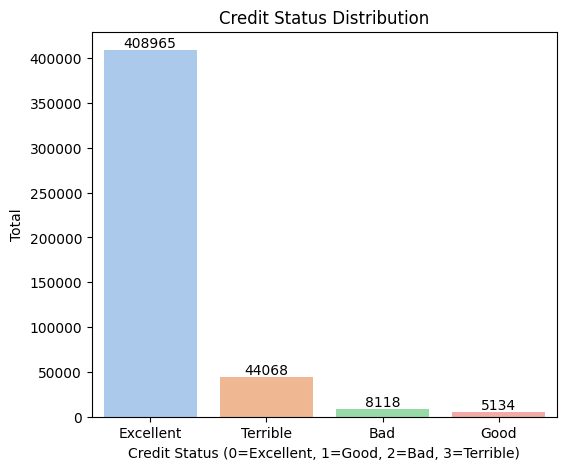

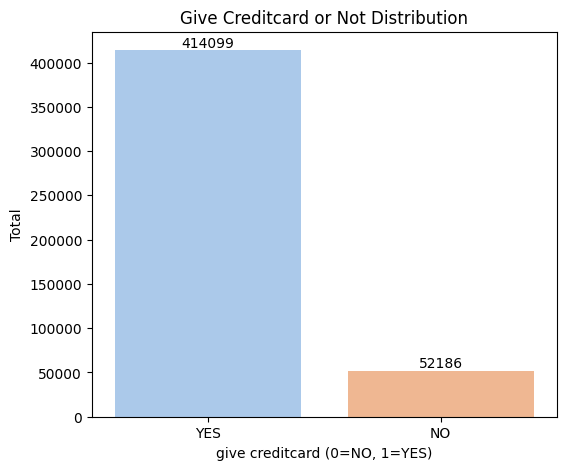

In [84]:
#图像呈现
resign_counts = df['credit_status'].value_counts()

plt.figure(figsize=(6, 5))
sns.barplot(x=resign_counts.index, y=resign_counts.values, palette=sns.color_palette("pastel", n_colors=len(resign_counts))) # "pastel"=柔和配色
plt.xlabel('Credit Status (0=Excellent, 1=Good, 2=Bad, 3=Terrible)')
plt.ylabel('Total')
plt.title('Credit Status Distribution')
for i, v in enumerate(resign_counts.values):
    plt.text(i, v + 0.05, str(v), ha='center', va='bottom')

plt.show()
resign_counts = df['give_creditcard'].value_counts()

plt.figure(figsize=(6, 5))
sns.barplot(x=resign_counts.index, y=resign_counts.values, palette=sns.color_palette('pastel', n_colors=len(resign_counts))) ## "pastel"=柔和配色
plt.xlabel('give creditcard (0=NO, 1=YES)')
plt.ylabel('Total')
plt.title('Give Creditcard or Not Distribution')
for i, v in enumerate(resign_counts.values):
    plt.text(i, v + 0.05, str(v), ha='center', va='bottom')

plt.show()

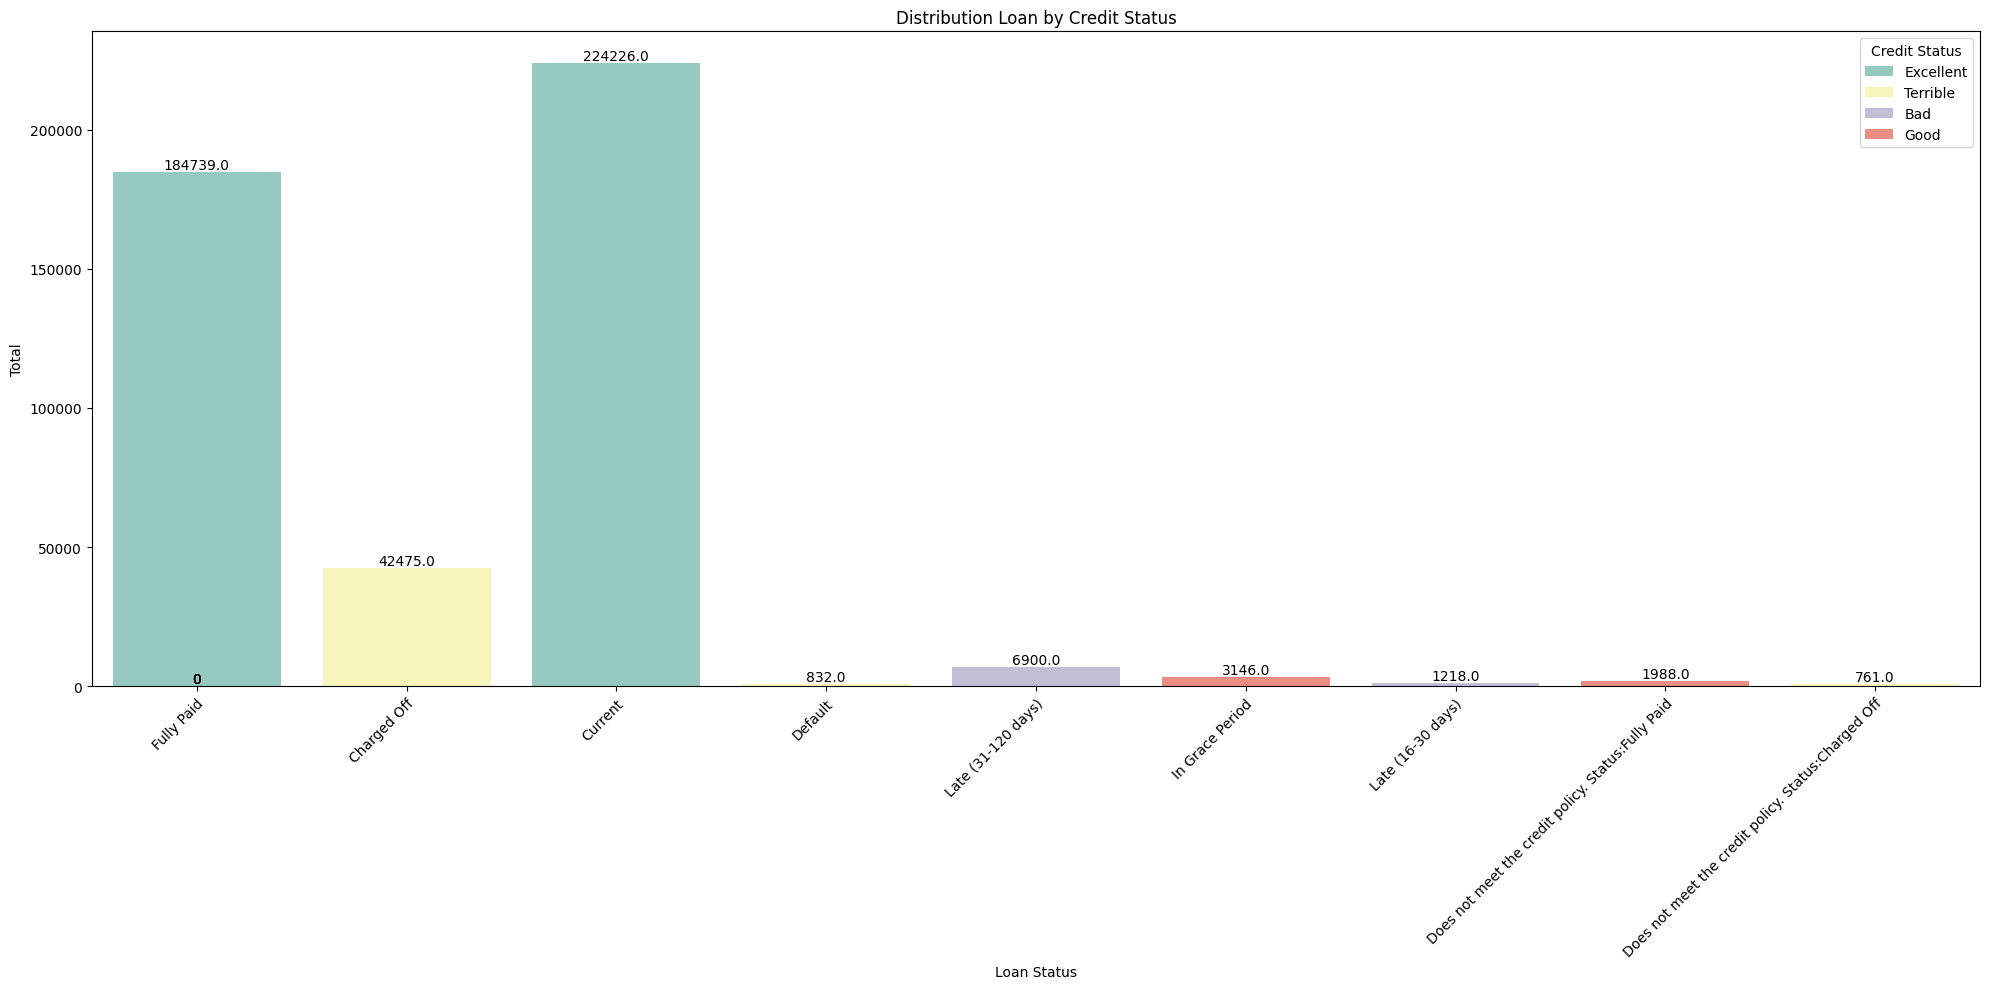

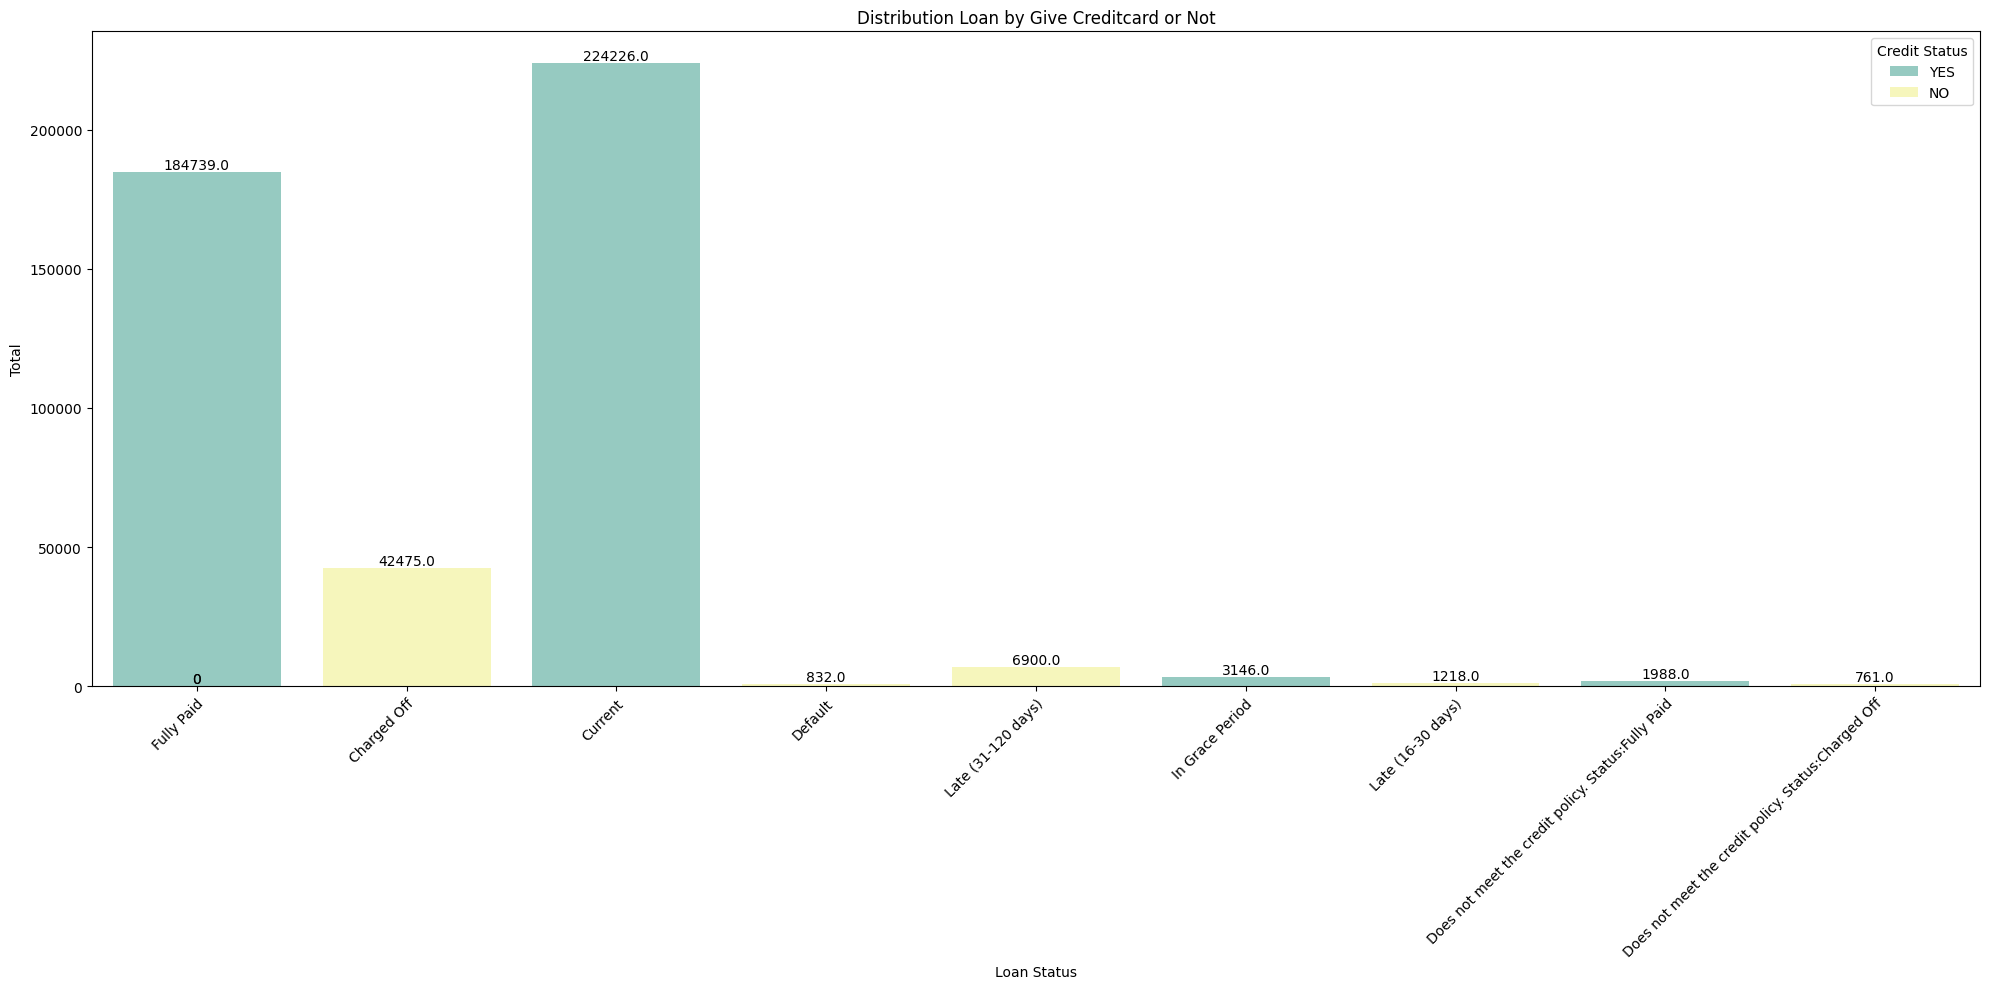

In [85]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='loan_status', hue='credit_status', data=df, palette='Set3')

plt.xlabel('Loan Status')
plt.ylabel('Total')
plt.title('Distribution Loan by Credit Status')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.legend(title='Credit Status')

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
ax = sns.countplot(x='loan_status', hue='give_creditcard', data=df, palette='Set3')

plt.xlabel('Loan Status')
plt.ylabel('Total')
plt.title('Distribution Loan by Give Creditcard or Not')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.legend(title='Credit Status')

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  
plt.tight_layout()
plt.show()

In [86]:
df['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [87]:
df.dtypes
#改数据类型
# 1.object ——> int
# Convert Object to Numerical without Hirarcy
df['term'] = df['term'].astype('str').str.replace(' months', '').astype(int)
df['home_ownership'] = df['home_ownership'].astype('category').cat.codes
df['verification_status'] = df['verification_status'].astype('category').cat.codes
df['purpose'] = df['purpose'].astype('category').cat.codes
df['initial_list_status'] = df['initial_list_status'].map({'f': 0, 'w': 1})

df.dtypes
#2.object ——> Datatime ——> YYYYMM
# Convert Object to DateTime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

# Convert DateTime to Numerical : YYYYMM
df['issue_d'] = df['issue_d'].apply(lambda x: int(x.strftime('%Y%m')))
df['last_pymnt_d'] = df['last_pymnt_d'].apply(lambda x: int(x.strftime('%Y%m')))
df['last_credit_pull_d'] = df['last_credit_pull_d'].apply(lambda x: int(x.strftime('%Y%m')))



In [88]:
df['grade']

0         B
1         C
2         C
3         C
4         B
         ..
466280    C
466281    D
466282    D
466283    A
466284    D
Name: grade, Length: 466285, dtype: object

In [89]:
df.dtypes

# Grade
grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

df['grade'] = df['grade'].map(grade_mapping)
df['grade']


0         2
1         3
2         3
3         3
4         2
         ..
466280    3
466281    4
466282    4
466283    1
466284    4
Name: grade, Length: 466285, dtype: int64

In [90]:
df['sub_grade']

0         B2
1         C4
2         C5
3         C1
4         B5
          ..
466280    C2
466281    D5
466282    D1
466283    A4
466284    D3
Name: sub_grade, Length: 466285, dtype: object

In [91]:
# Sub_grade
# Extract the numbers behind 'sub_grade'
df['sub_grade'] = df['sub_grade'].str.extract('(\d)').astype(int)

# Combine both into the 'sub_grade' column
df['sub_grade'] = df['grade'] * 10 + df['sub_grade']
df['sub_grade']

0         22
1         34
2         35
3         31
4         25
          ..
466280    32
466281    45
466282    41
466283    14
466284    43
Name: sub_grade, Length: 466285, dtype: int64

In [92]:
df['emp_length']

0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
466280      4 years
466281    10+ years
466282      7 years
466283      3 years
466284    10+ years
Name: emp_length, Length: 466285, dtype: object

In [93]:
# emp_length
emp_length_mapping = {
    'Unknown': 0,
    '< 1 year': 1,
    '1 year': 2,
    '2 years': 3,
    '3 years': 4,
    '4 years': 5,
    '5 years': 6,
    '6 years': 7,
    '7 years': 8,
    '8 years': 9,
    '9 years': 10,
    '10+ years': 11
}

df['emp_length'] = df['emp_length'].map(emp_length_mapping)
df['emp_length']

0         11
1          1
2         11
3         11
4          2
          ..
466280     5
466281    11
466282     8
466283     4
466284    11
Name: emp_length, Length: 466285, dtype: int64

In [94]:
df['loan_status']

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
             ...     
466280        Current
466281    Charged Off
466282        Current
466283     Fully Paid
466284        Current
Name: loan_status, Length: 466285, dtype: object

In [95]:
# loan_status
loan_status_mapping = {
    'Fully Paid': 1,
    'Current': 2,
    'In Grace Period': 3,
    'Late (16-30 days)': 4,
    'Late (31-120 days)': 5,
    'Default': 6,
    'Charged Off': 7,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Does not meet the credit policy. Status:Charged Off': 7
}

df['loan_status'] = df['loan_status'].map(loan_status_mapping)
df['loan_status']

0         1
1         7
2         1
3         1
4         2
         ..
466280    2
466281    7
466282    2
466283    1
466284    2
Name: loan_status, Length: 466285, dtype: int64

In [96]:
# payment_plan
df['pymnt_plan'] = df['pymnt_plan'].map({'n': 0, 'y': 1})
df['pymnt_plan']
df['pymnt_plan'].unique()

array([0, 1])

In [97]:
df['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [98]:
# Convert to DateTime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

# Calculate the Credit History Length (in years)
df['credit_history_length'] = (pd.to_datetime('today') - df['earliest_cr_line']).dt.days // 365

# Delete the original column
df.drop('earliest_cr_line', axis=1, inplace=True)

In [99]:
df['credit_history_length']

0         40
1         26
2         23
3         29
4         29
          ..
466280    22
466281    28
466282    23
466283    22
466284    25
Name: credit_history_length, Length: 466285, dtype: int64

In [100]:
# credit_status
label_mapping = {
    'Excellent': 0,
    'Good': 1,
    'Bad': 2,
    'Terrible': 3
    }
df['credit_label'] = df['credit_status'].map(label_mapping)
df['credit_status']
df['credit_label']

0         0
1         3
2         0
3         0
4         0
         ..
466280    0
466281    3
466282    0
466283    0
466284    0
Name: credit_label, Length: 466285, dtype: int64

In [101]:
# give_creditcard
label_mapping = {
    'YES': 0,
    'NO': 1
    }
df['give_label'] = df['give_creditcard'].map(label_mapping)
df['give_label']

0         0
1         1
2         0
3         0
4         0
         ..
466280    0
466281    1
466282    0
466283    0
466284    0
Name: give_label, Length: 466285, dtype: int64

In [102]:
# 相关性检验
# Categorical Column
df_cat = df.select_dtypes(include='object')

# Numerical Column
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numeric)

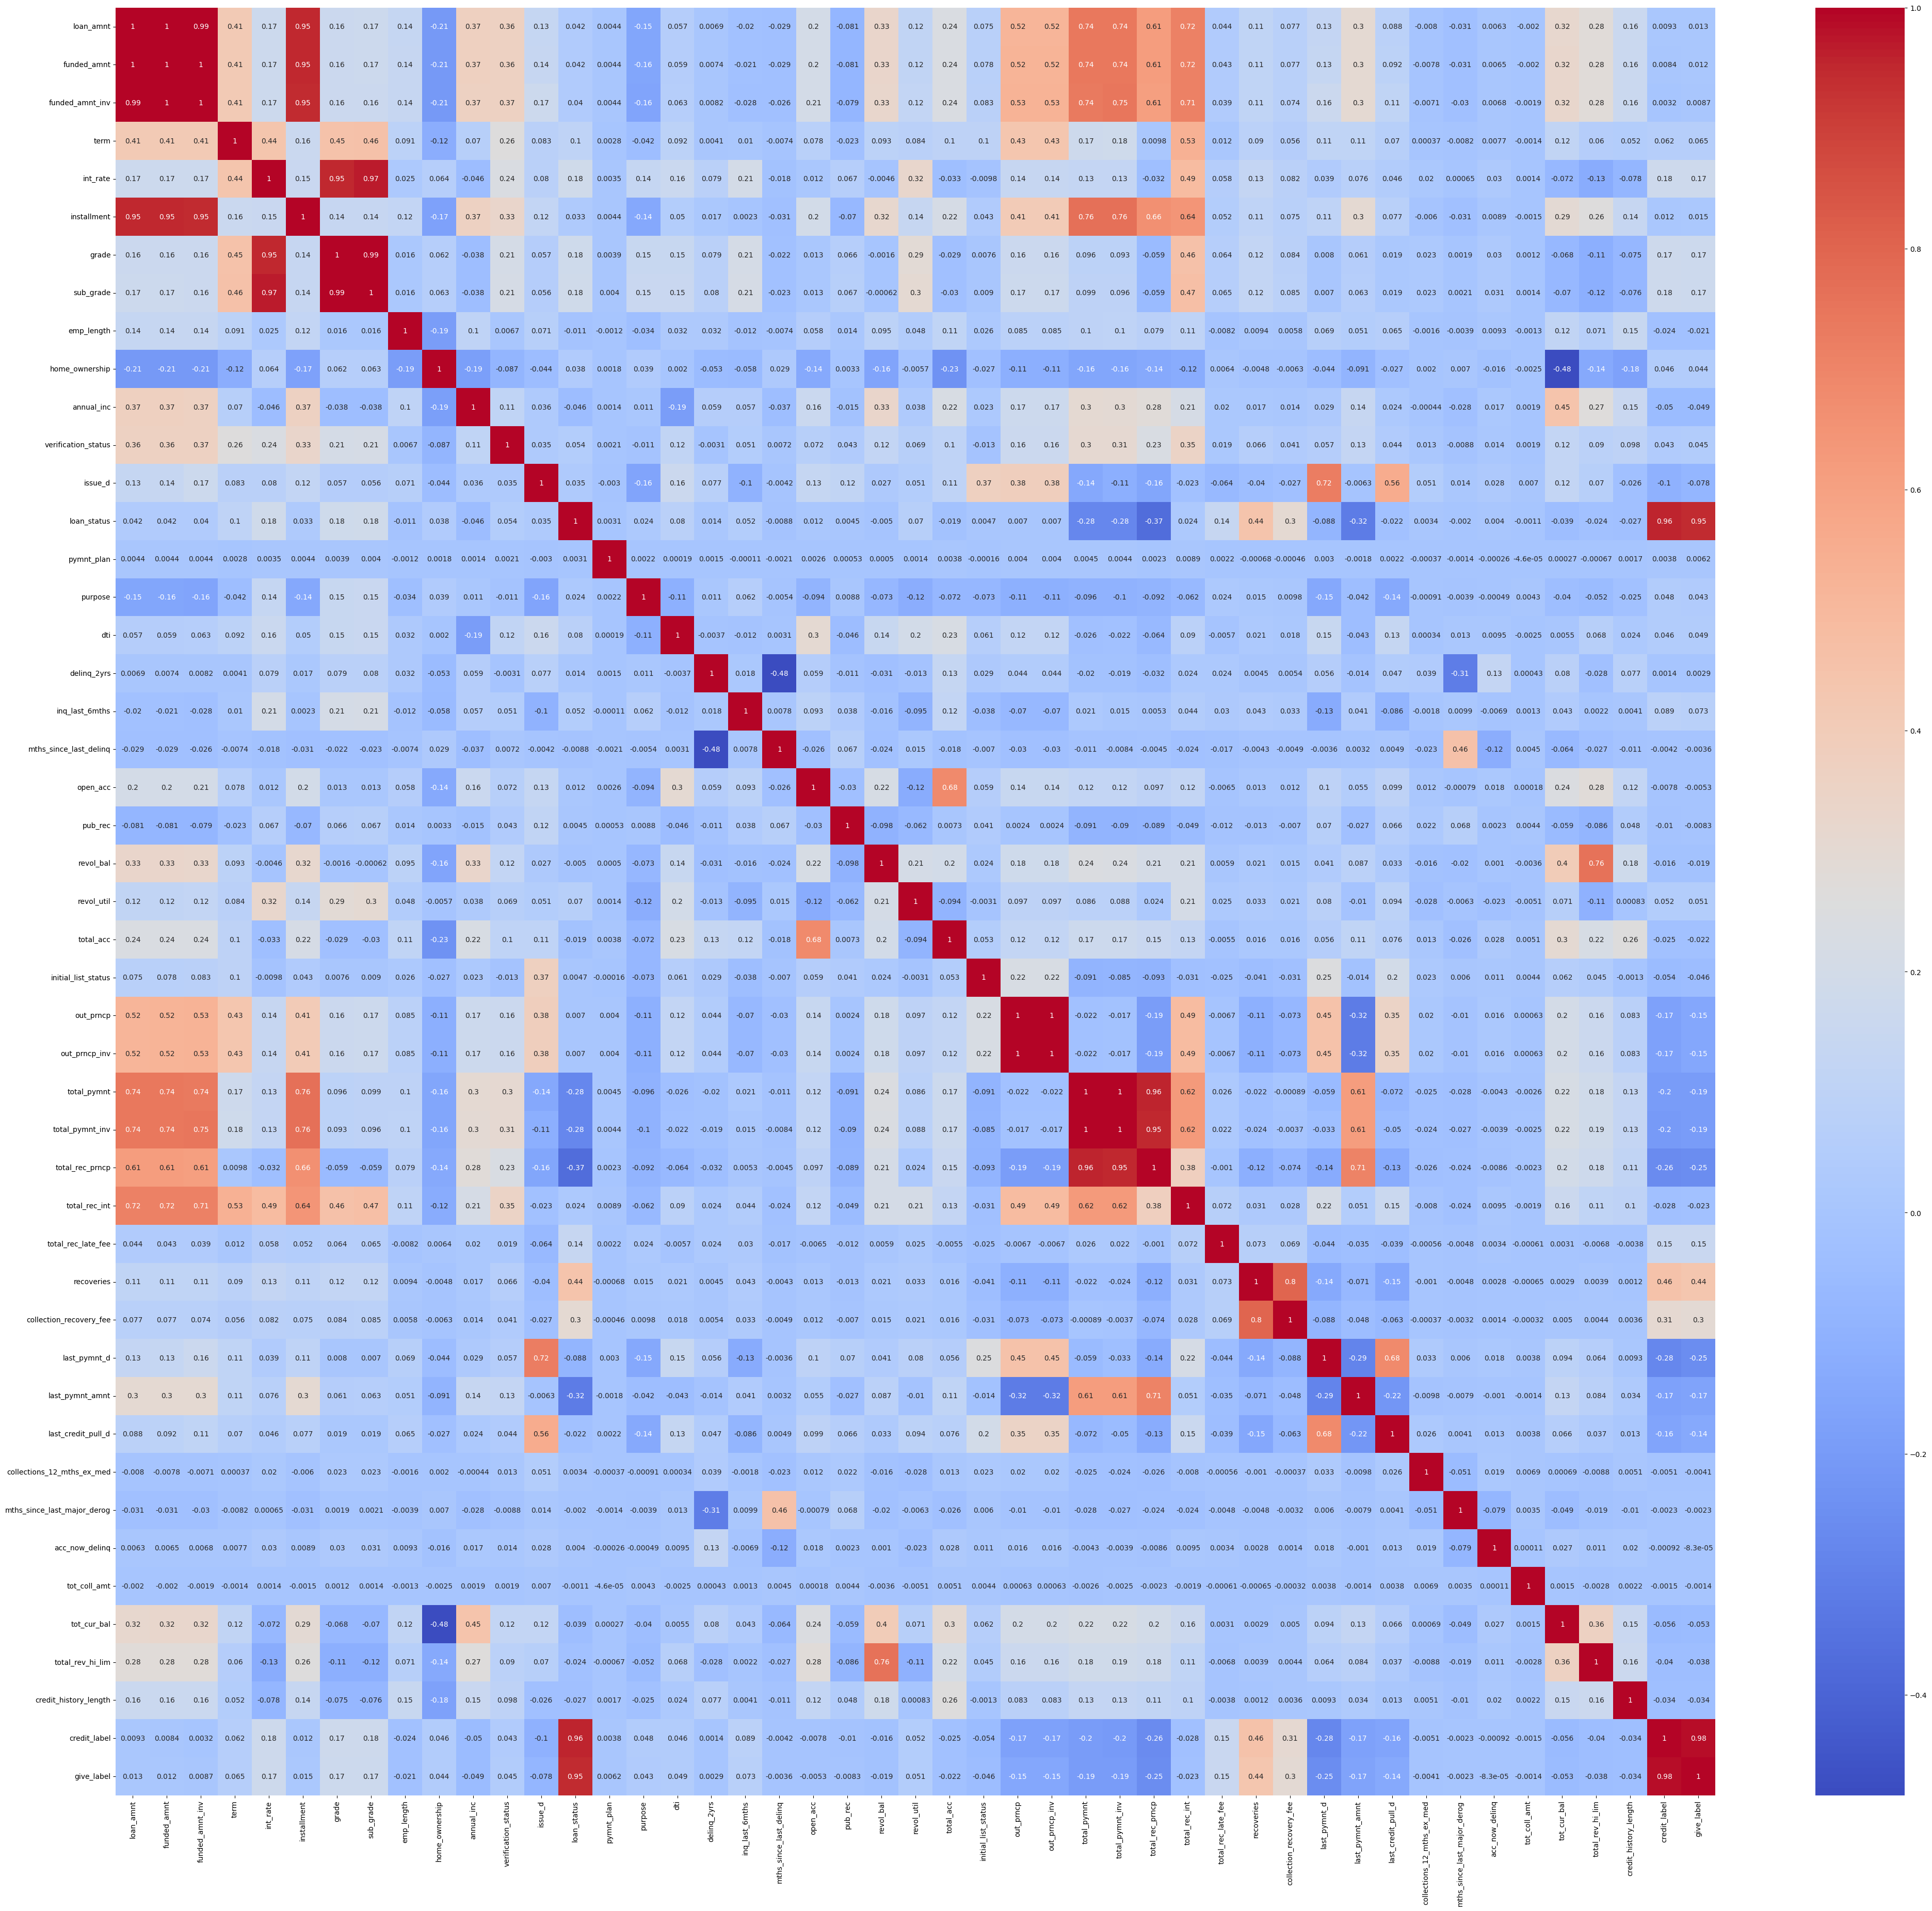

In [103]:
plt.figure(figsize=(50,45))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

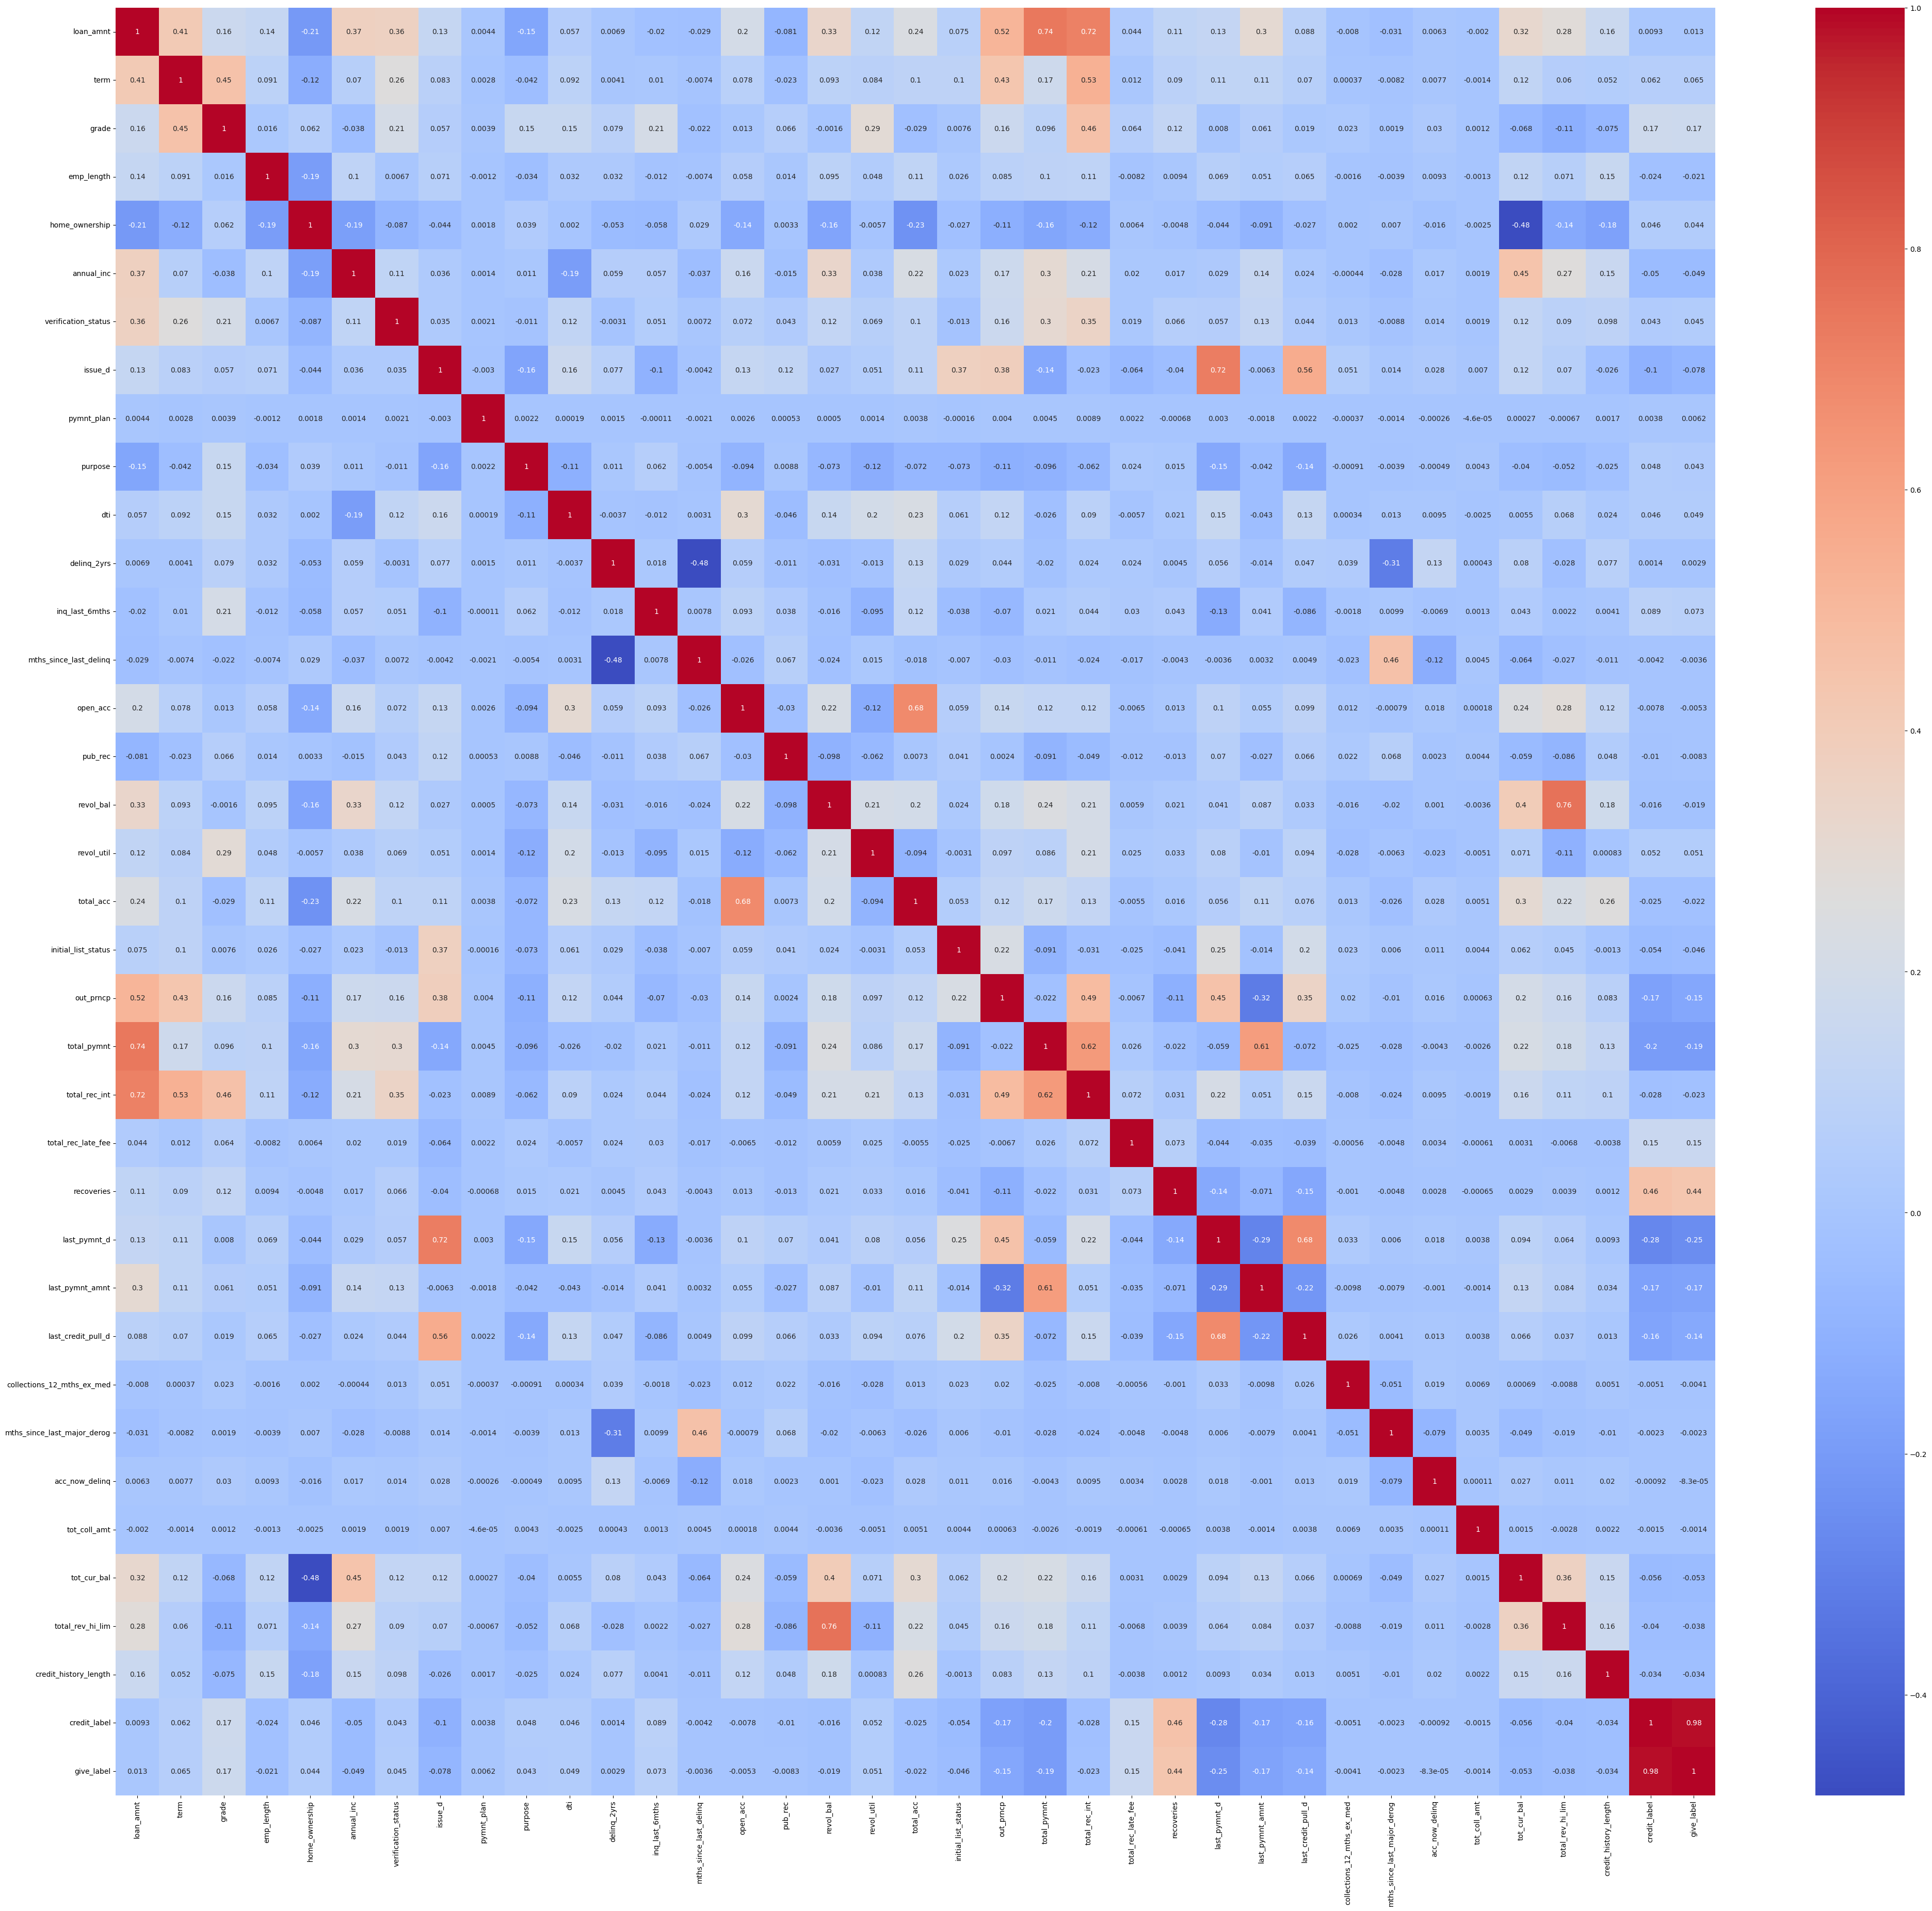

In [104]:
df = df.drop(columns=['funded_amnt','funded_amnt_inv','installment','int_rate','sub_grade',
                      'out_prncp_inv','total_pymnt_inv','total_rec_prncp','collection_recovery_fee',
                      'loan_status'])

numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numeric)

plt.figure(figsize=(50,45))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

In [105]:
# 多了give_label和give_creaditcard
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  int64  
 2   grade                        466285 non-null  int64  
 3   emp_title                    466285 non-null  object 
 4   emp_length                   466285 non-null  int64  
 5   home_ownership               466285 non-null  int8   
 6   annual_inc                   466285 non-null  float64
 7   verification_status          466285 non-null  int8   
 8   issue_d                      466285 non-null  int64  
 9   pymnt_plan                   466285 non-null  int64  
 10  url                          466285 non-null  object 
 11  purpose                      466285 non-null  int8   
 12  title                        466285 non-null  object 
 13 

In [106]:
# 预测集和训练集
X = df_num.drop(['credit_label', 'give_label'], axis=1)
X.info()
y = df_num['credit_label']
y.info()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20251013)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  int64  
 2   grade                        466285 non-null  int64  
 3   emp_length                   466285 non-null  int64  
 4   home_ownership               466285 non-null  int8   
 5   annual_inc                   466285 non-null  float64
 6   verification_status          466285 non-null  int8   
 7   issue_d                      466285 non-null  int64  
 8   pymnt_plan                   466285 non-null  int64  
 9   purpose                      466285 non-null  int8   
 10  dti                          466285 non-null  float64
 11  delinq_2yrs                  466285 non-null  float64
 12  inq_last_6mths               466285 non-null  float64
 13 

In [107]:
#保存训练集，预测集
save_train = 'Data/data_train'
if not os.path.exists(save_train):
    os.makedirs(save_train)

X_train.to_csv(os.path.join(save_train, "X_train.csv"), index=False)  # index=False 不保存索引列
y_train.to_csv(os.path.join(save_train, "y_train.csv"), index=False)

save_test = 'Data/data_test'
if not os.path.exists(save_test):
    os.makedirs(save_test)

X_test.to_csv(os.path.join(save_test, "X_test.csv"), index=False)
y_test.to_csv(os.path.join(save_test, "y_test.csv"), index=False)


In [108]:
#读取
#train
X_train = pd.read_csv('Data/data_train/X_train.csv')
y_train = pd.read_csv('Data/data_train/y_train.csv')

#test
X_test = pd.read_csv('Data/data_test/X_test.csv')
y_test = pd.read_csv('Data/data_test/y_test.csv')